In [1]:
import json
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Dataset

In [2]:
# image_val_path = 'bdd100k/images/100k/train/'
# label_path = 'bdd100k/labels/bdd100k_labels_images_train.json'
# save_label_path = 'bdd100k/labels/bdd100k_labels_images_train_highway_night.json'

In [3]:
image_val_path = 'bdd100k/images/100k/val/'
label_path = 'bdd100k/labels/bdd100k_labels_images_val.json'
save_label_path = 'bdd100k/labels/bdd100k_labels_images_val_highway_night.json'

In [4]:
json_file = open(label_path, 'r')
labels_json = json.load(json_file)

# Keys

In [5]:
labels_json[0].keys()

dict_keys(['timestamp', 'attributes', 'labels', 'name'])

In [6]:
labels_json[0]['labels'][0].keys()

dict_keys(['id', 'manualShape', 'box2d', 'manualAttributes', 'category', 'attributes'])

In [7]:
labels_json[0]['attributes'].keys()

dict_keys(['weather', 'timeofday', 'scene'])

In [8]:
labels_json[0]['attributes']

{'scene': 'city street', 'timeofday': 'daytime', 'weather': 'overcast'}

# Pandas Dataframe

In [9]:
df = pd.DataFrame(labels_json)

In [10]:
print(len(df))
df.head()

10000


,attributes,labels,name,timestamp
0,"{'weather': 'overcast', 'timeofday': 'daytime'...","[{'id': 0, 'manualShape': True, 'box2d': {'y2'...",b1c66a42-6f7d68ca.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 51, 'manualShape': True, 'box2d': {'y2...",b1c81faa-3df17267.jpg,10000
2,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'box2d': {'y2...",b1c81faa-c80764c5.jpg,10000
3,"{'weather': 'undefined', 'timeofday': 'daytime...","[{'id': 92, 'manualShape': True, 'box2d': {'y2...",b1c9c847-3bda4659.jpg,10000
4,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 116, 'manualShape': True, 'box2d': {'y...",b1ca2e5d-84cf9134.jpg,10000


# Search highway and night seans

In [11]:
df_highway = df[df.apply(lambda x: x['attributes']['scene'], axis=1) == 'highway']

In [12]:
df_highway_night = df_highway[df_highway.apply(lambda x: x['attributes']['timeofday'], axis=1) == 'night']

In [13]:
df_highway_night = df_highway_night.reset_index(drop=True)

In [14]:
print(len(df_highway_night))
df_highway_night.head()

1007


,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 51, 'manualShape': True, 'box2d': {'y2...",b1c81faa-3df17267.jpg,10000
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'box2d': {'y2...",b1c81faa-c80764c5.jpg,10000
2,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 831, 'manualShape': True, 'box2d': {'y...",b1d22449-117aa773.jpg,10000
3,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 1620, 'manualShape': True, 'box2d': {'...",b1e2346e-c5f98707.jpg,10000
4,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 1700, 'manualShape': True, 'box2d': {'...",b1e88fd2-c1e4fd2b.jpg,10000


In [15]:
df_highway_night['attributes'][0]

{'scene': 'highway', 'timeofday': 'night', 'weather': 'clear'}

# Search parallel four lanes seans

In [16]:
df_highway_night_lane = pd.DataFrame()

for i in range(len(df_highway_night)):
    tmp_se = df_highway_night.iloc[i]
    tmp_label = df_highway_night.iloc[i]['labels']
    
    lane_count = 0
    vertical_flag = False
    for j in range(len(tmp_label)):
        if 'laneDirection' in tmp_label[j]['attributes']:
            if tmp_label[j]['attributes']['laneDirection'] == 'parallel':
                lane_count += 1
            elif tmp_label[j]['attributes']['laneDirection'] == 'vertical':
                vertical_flag = True

    if lane_count >= 4 and vertical_flag == False:
        df_highway_night_lane = df_highway_night_lane.append(tmp_se)

In [17]:
df_highway_night_lane = df_highway_night_lane.reset_index(drop=True)

In [18]:
print(len(df_highway_night_lane))
df_highway_night_lane.head()

726


,attributes,labels,name,timestamp
0,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 51, 'manualShape': True, 'box2d': {'y2...",b1c81faa-3df17267.jpg,10000.0
1,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 68, 'manualShape': True, 'box2d': {'y2...",b1c81faa-c80764c5.jpg,10000.0
2,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 831, 'manualShape': True, 'box2d': {'y...",b1d22449-117aa773.jpg,10000.0
3,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 1620, 'manualShape': True, 'box2d': {'...",b1e2346e-c5f98707.jpg,10000.0
4,"{'weather': 'clear', 'timeofday': 'night', 'sc...","[{'id': 1700, 'manualShape': True, 'box2d': {'...",b1e88fd2-c1e4fd2b.jpg,10000.0


# Show

In [19]:
data_example_name = df_highway_night_lane.iloc[0]['name']

In [20]:
img_path = image_val_path + data_example_name
img = mpimg.imread(img_path)
img_path

'bdd100k/images/100k/val/b1c81faa-3df17267.jpg'

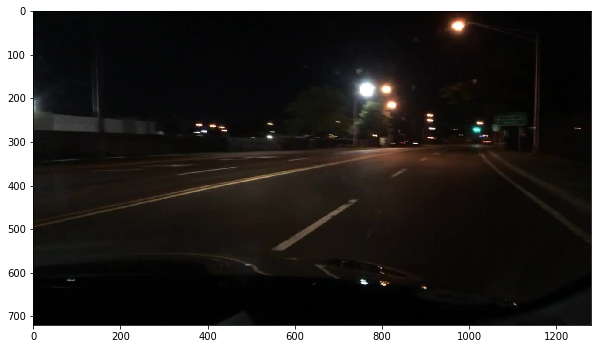

In [21]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

# pandas dataframe -> dict

In [22]:
dict_highway_night_lane = df_highway_night_lane.to_dict(orient='index')

# dict -> list

In [23]:
list_highway_night_lane = list(dict_highway_night_lane.items())

# delete list index

In [24]:
list_highway_night_lane[0][0]

0

In [25]:
l = list_highway_night_lane
list_highway_night_lane_delete_index = list([v[1] for v in l])

# Save into a json file with indent

In [26]:
with open(save_label_path, 'w') as f:
    json.dump(list_highway_night_lane_delete_index, f, indent=4)

# Result 

In [27]:
print(len(df), '->', len(df_highway_night), '->', len(df_highway_night_lane))

10000 -> 1007 -> 726
